# 1) Implement a KNN model to classify the animals in to categorie

In [18]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [19]:
zoo1=pd.read_csv("zoo.csv")


In [20]:
zoo=zoo1.drop_duplicates()

In [21]:
zoo.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [22]:
inputs=zoo.iloc[:,1:17]
target=zoo.iloc[:,17]
inputs

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [23]:
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.3,random_state=1)

# Accuracy

In [24]:
parameters = {'n_neighbors':range(1, 51), 
              'weights':['uniform']}

In [25]:
grid_search=GridSearchCV(estimator=KNeighborsClassifier(),
                        param_grid=parameters,
                        scoring='accuracy')

In [26]:
grid_search.fit(x_train,y_train)

C:\Users\DELL\anaconda3\ds.py.ad\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51), 'weights': ['uniform']},
             scoring='accuracy')

In [27]:
grid_search.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [28]:
grid_search.best_score_

0.9285714285714285

In [29]:
 grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=1)

# Classification_report

In [30]:
clf =  grid_search.best_estimator_

In [31]:
y_pred_ = clf.predict(x_test)
y_pred_

array([1, 2, 1, 2, 1, 7, 1, 2, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 7, 3, 2, 1,
       6, 6, 4, 7, 6, 1, 4, 1, 1], dtype=int64)

In [32]:
print(classification_report(y_test, y_pred_, target_names = ['1', '2', '4','7','6','3','5']))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         5
           4       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3

    accuracy                           0.97        31
   macro avg       0.79      0.86      0.81        31
weighted avg       0.95      0.97      0.96        31



C:\Users\DELL\anaconda3\ds.py.ad\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\ds.py.ad\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\ds.py.ad\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
clf.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

C:\Users\DELL\anaconda3\ds.py.ad\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [39]:
error_uniform = []
error_distance = []


k_range = range(1, 51)


for k in k_range:
    
    clf = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    error_uniform.append(1 - accuracy_score(y_test, predictions))
    
    clf = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    error_distance.append(1 - accuracy_score(y_test, predictions))

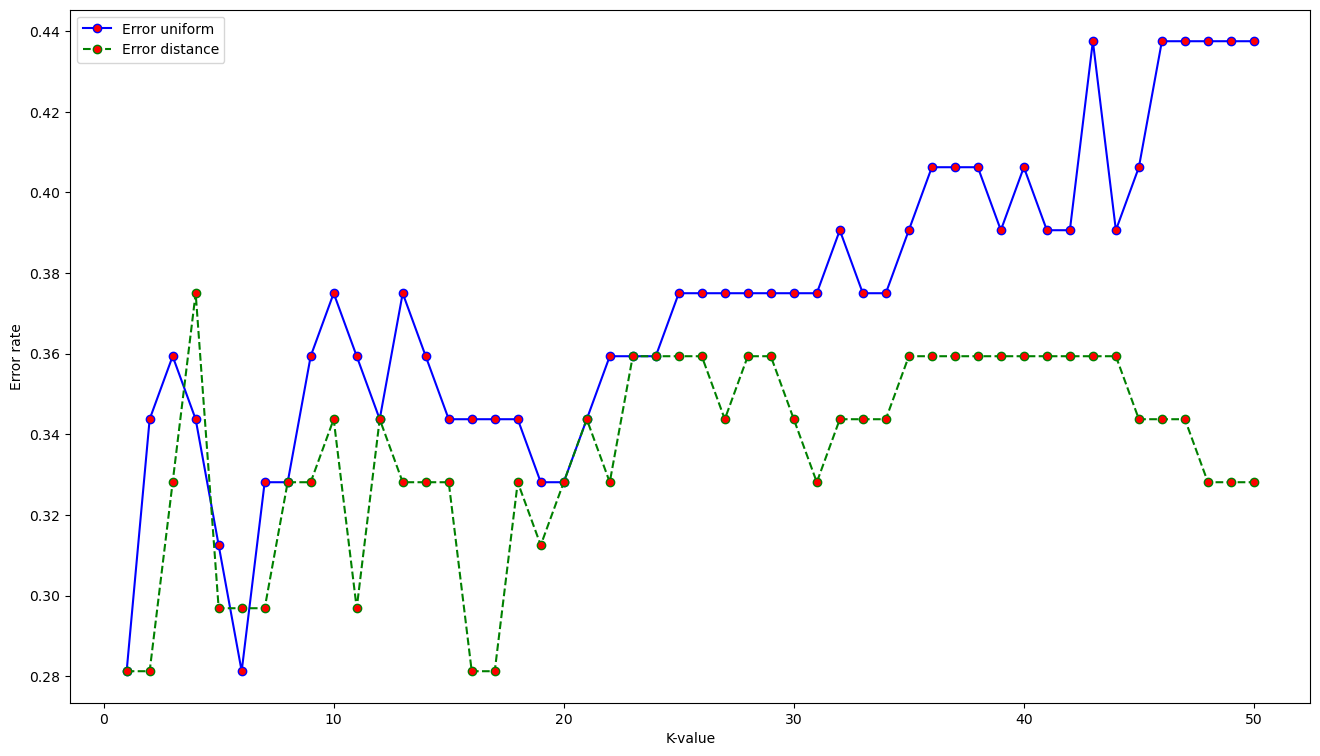

In [40]:
plt.figure(figsize = (16, 9))

plt.plot(k_range, error_uniform, c = 'blue', linestyle = 'solid', 
         marker = 'o', markerfacecolor = 'red',  label = 'Error uniform');
plt.plot(k_range, error_distance, c = 'green', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'red', label = 'Error distance');

plt.legend()

plt.xlabel('K-value')
plt.ylabel('Error rate');

# 2)Prepare a model for glass classification using KNN

In [2]:
glass1=pd.read_csv("glass.csv")

In [3]:
glass=glass1.drop_duplicates()
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
inputs=glass.iloc[:,:9]
target=glass.iloc[:,9]

In [5]:
target.value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [6]:
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.3,random_state=1)

In [7]:
parameters= {'n_neighbors':range(1,51),'weights':['uniform','distance']}

In [8]:
grid_search=GridSearchCV(estimator=KNeighborsClassifier(),
                        param_grid=parameters,
                        scoring='accuracy')

In [9]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [10]:
grid_search.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [11]:
grid_search.best_score_

0.6910344827586206

In [12]:
clf=grid_search.best_estimator_

In [13]:
clf

KNeighborsClassifier(n_neighbors=1)

In [14]:
y_pred=clf.predict(x_test)
y_pred.shape

(64,)

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.69      0.78      0.73        23
           2       0.86      0.55      0.67        22
           3       0.44      0.57      0.50         7
           5       0.67      1.00      0.80         2
           6       0.50      1.00      0.67         2
           7       1.00      1.00      1.00         8

    accuracy                           0.72        64
   macro avg       0.69      0.82      0.73        64
weighted avg       0.75      0.72      0.72        64



In [16]:
error_uniform = []
error_distance = []


k_range = range(1, 51)


for k in k_range:
    
    clf = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    error_uniform.append(1 - accuracy_score(y_test, predictions))
    
    clf = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    error_distance.append(1 - accuracy_score(y_test, predictions))

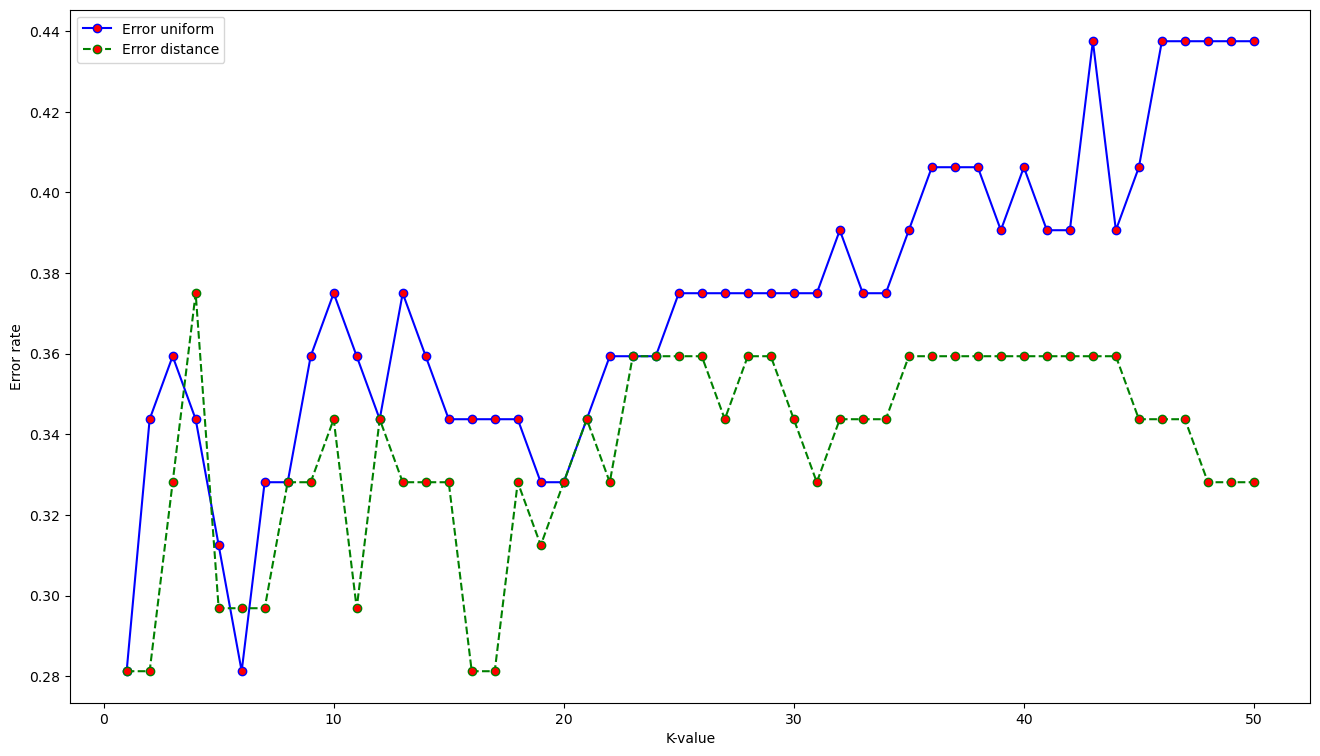

In [17]:
plt.figure(figsize = (16, 9))

plt.plot(k_range, error_uniform, c = 'blue', linestyle = 'solid', 
         marker = 'o', markerfacecolor = 'red',  label = 'Error uniform');
plt.plot(k_range, error_distance, c = 'green', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'red', label = 'Error distance');

plt.legend()

plt.xlabel('K-value')
plt.ylabel('Error rate');